In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [15]:
# libraries to import the .mat files
import scipy.io as sio
import h5py

In [16]:
# importing os to get the current directory
import os

# Loading the data 

- We use the naming format of the data files to extract the information from them and store them in the dataframe ```data``` variable.
- The ```data``` variable stores a dictionary where each key corresponds to a file (We might consolidate all the entries into one dataframe later on). Each entry in the dictionary stores a list of datapoints. 
- Each datapoint is a dictionary with the following keys: 
    - <i>PID</i>: Patient ID
    - <i>image</i>: Image data
    - <i>label</i>: Label of the image
    - <i>tumorBorder</i>: Tumor border data
    - <i>tumorMask</i>: Tumor mask data

In [17]:
# Define the directory where the data is located
data_dir = 'data'

# Get a list of all subdirectories in the data directory that start with 'brainTumorDataPublic_'
data_dirs = [f for f in os.listdir(data_dir) if f.startswith('brainTumorDataPublic_') and os.path.isdir(os.path.join(data_dir, f))]

# Initialize an empty list to store the data
data = {}
counter = 0
dir_counter = 0

# Loop over each subdirectory
for d in data_dirs:

    data[dir_counter] = []

    # Get a list of all .mat files in the subdirectory
    files = [f for f in os.listdir(os.path.join(data_dir, d)) if f.endswith('.mat')]
    
    # Load each .mat file and append it to the data list
    for f in files:
        with h5py.File(os.path.join(data_dir, d, f), 'r') as file:
            # Access the 'cjdata' group
            cjdata = file['cjdata']

            # Initialize an empty dictionary to store the data from this file
            file_data = {}
            
            # Convert the data to a numpy array and append it to the data list
            for name in cjdata:
                # Add the member to the dictionary
                file_data[name] = np.array(cjdata[name])
                if name == 'label':
                    file_data[name] = file_data[name][0][0]
            # Append the dictionary to the data list
            data[dir_counter].append(file_data)

            # Increment the counter
            counter += 1
            # print the PID and label
            # print(f'Counter: {counter}')
    dir_counter += 1
            

In [18]:
# Consolidate the data into a single list
data_list = []
for j in range(4):
    print(f'Number of samples in data[{j}]: {len(data[j])}')
    data_list += data[j]

print(f'Number of samples: {len(data_list)}')


Number of samples in data[0]: 500
Number of samples in data[1]: 766
Number of samples in data[2]: 766
Number of samples in data[3]: 766
Number of samples: 2798


In [19]:
# print the max values of each image, tumorMask, and tumorBorder
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 12728
Max tumor mask value: 1
Max tumor border value: 470.0766550522648


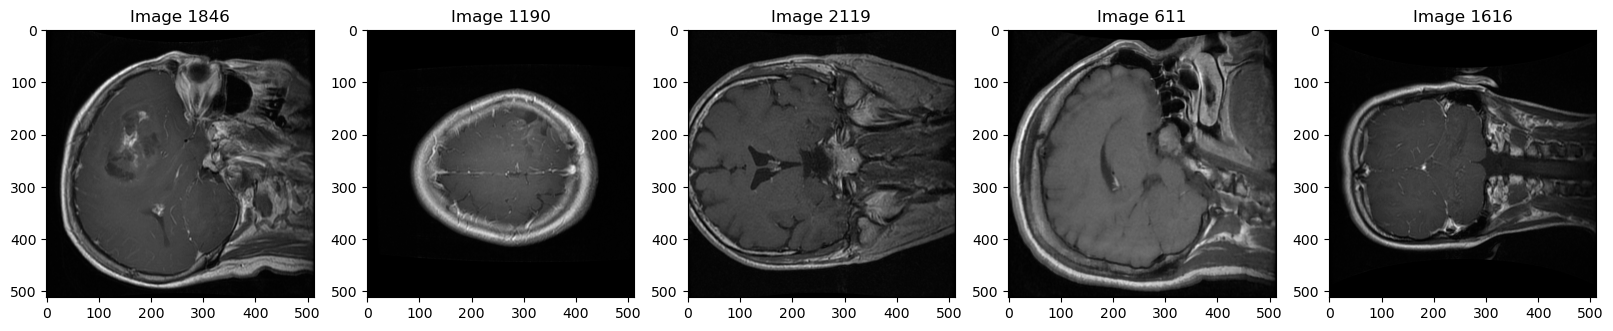

In [20]:
# Normalize the images and bounding box coordinates
for i in range(len(data_list)):
    data_list[i]['image'] = data_list[i]['image'] / max_image  # Normalize the image
    data_list[i]['tumorBorder'] = data_list[i]['tumorBorder'] / 512  # Assuming the image size is 512x512, which we have confirmed it to be

# Display the 5 random images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    idx = np.random.randint(len(data_list))
    ax[i].imshow(data_list[idx]['image'], cmap='gray')
    ax[i].set_title(f'Image {idx}')
plt.show()



In [21]:
# print the max values of each image, tumorMask, and tumorBorder to confirm that they have been normalized
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 1.0
Max tumor mask value: 1
Max tumor border value: 0.9181184668989547


In [22]:
# print the raw array of an image, tumorMask, and tumorBorder

print(f'Image: {data_list[0]["image"]}')
print(f'Tumor Mask: {data_list[0]["tumorMask"]}')
print(f'Tumor Border: {data_list[0]["tumorBorder"]}')


Image: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 7.8566939e-05 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Tumor Mask: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Tumor Border: [[0.52268603 0.45190563 0.54264973 0.4845735  0.56624319 0.49001815
  0.59709619 0.49546279 0.62250454 0.48820327 0.62794918 0.4646098
  0.69328494 0.45735027 0.71869328 0.4446461  0.74410163 0.41197822
  0.7277677  0.38112523 0.70961887 0.34664247 0.68421053 0.34482759
  0.6569873 

In [23]:
# Load the model from base_classifier/saved_model.pb using keras

import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('base_classifier/')

In [31]:
from sklearn.metrics import confusion_matrix

# For n classes
n = int(max([data['label'] for data in data_list]) + 1)

# Initialize the confusion matrix
confusion = np.zeros((n, n))

for i in range(100):
    idx = np.random.randint(len(data_list))
    image = data_list[idx]['image']
    image = np.expand_dims(image, axis=0)
    predicted_label = np.argmax(model.predict(image)) + 1
    expected_label = data_list[idx]['label']
    
    # Update the confusion matrix
    confusion[int(predicted_label - 1), int(expected_label - 1)] += 1

print(confusion)

1/1 [==============================] - 0s 54ms/step
[[14. 34.  1.  0.]
 [ 0. 15.  0.  0.]
 [ 2.  4. 30.  0.]
 [ 0.  0.  0.  0.]]


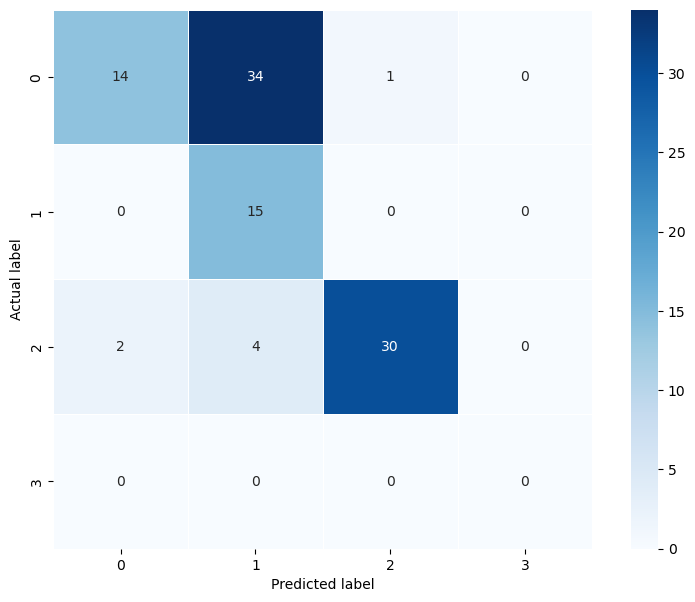

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
import tensorflow as tf
print(tf.__version__)

2.13.0
